In [29]:
import pandas as pd
traf = pd.read_csv('Forbes-Project.csv')
TMC = pd.read_csv('TMC_Identification_REVISED.csv')

In [30]:
##To filter out data of fifth avenue eastbound and westbound
traf = traf.loc[traf.confidence_score >= 30 , :]
forbes= TMC.loc[TMC.road == '5TH AVE',:]
EST1 = forbes.loc[forbes.direction == 'EASTBOUND',:]
WST1 = forbes.loc[forbes.direction == 'WESTBOUND',:]

In [31]:
traf.rename(columns={'tmc_code':'tmc'}, inplace = True)
traf.rename(columns={'measurement_tstamp':'Date'}, inplace=True)

In [32]:
#To merge the two data
main1 = pd.merge(EST1,traf,on= 'tmc', how = 'inner')
main2 = pd.merge(WST1,traf,on= 'tmc', how = 'inner')

In [33]:
##To change the data types of date from object to datetime
import datetime as dt
main1['Date'] = pd.to_datetime(main1['Date'])
main2['Date'] = pd.to_datetime(main2['Date'])

In [ ]:
##To group data at an interval of 30 mins.
main1 = main1.groupby(pd.Grouper(key = 'Date',freq = '30T')).mean()
main2 = main2.groupby(pd.Grouper(key = 'Date',freq = '30T')).mean()

In [ ]:
main1=main1.reset_index()
main2=main2.reset_index()

In [34]:
##To get a new column hour  
main1['hour'] = main1['Date'].dt.hour 
main2['hour'] = main2['Date'].dt.hour 

In [35]:
import datetime
t1= pd.to_datetime('1-2-2017')
t2= pd.to_datetime('5-15-2017')
t3= pd.to_datetime('8-1-2017')
t4= pd.to_datetime('11-20-2017')
t5 = pd.to_datetime('11-27-2017')
t6 = pd.to_datetime('12-20-2017')
t7 = pd.to_datetime('1-2-2018')
t8 = pd.to_datetime('5-15-2018')
t9 = pd.to_datetime('8-1-2018')
t10 = pd.to_datetime('11-20-2018')
t11 = pd.to_datetime('11-27-2018')
t12 = pd.to_datetime('12-20-2018')
t13 = pd.to_datetime('1-2-2019')
t14 = pd.to_datetime('5-15-2019')

In [36]:
##To get data between the defined time Period
spring1 = main1[main1["Date"].between(t1,t2)]
summer1 = main1[main1["Date"].between(t2,t3)]
fall1 = main1[main1["Date"].between(t3,t4)]
fall2 = main1[main1["Date"].between(t5,t6)]
winter1 = main1[main1["Date"].between(t6,t7)]
spring2 = main1[main1["Date"].between(t7,t8)]
summer2 = main1[main1["Date"].between(t8,t9)]
fall3 = main1[main1["Date"].between(t9,t10)]
fall4 = main1[main1["Date"].between(t11,t12)]
winter2 = main1[main1["Date"].between(t12,t13)]
spring3 = main1[main1["Date"].between(t13,t14)]

In [37]:
spring1a = main2[main2["Date"].between(t1,t2)]
summer1a = main2[main2["Date"].between(t2,t3)]
fall1a = main2[main2["Date"].between(t3,t4)]
fall2a = main2[main2["Date"].between(t5,t6)]
winter1a = main2[main2["Date"].between(t6,t7)]
spring2a = main2[main2["Date"].between(t7,t8)]
summer2a = main2[main2["Date"].between(t8,t9)]
fall3a = main2[main2["Date"].between(t9,t10)]
fall4a = main2[main2["Date"].between(t11,t12)]
winter2a = main2[main2["Date"].between(t12,t13)]
spring3a = main2[main2["Date"].between(t13,t14)]

In [38]:
spring2 = spring2.append(spring3)
spring = spring1.append(spring2)
fall3 = fall3.append(fall4)
fall2 = fall2.append(fall3)
fall = fall1.append(fall2)
winter = winter1.append(winter2)
summer = summer1.append(summer2)

In [52]:
spring2a = spring2a.append(spring3a)
springa = spring1a.append(spring2a)
fall3a = fall3a.append(fall4a)
fall2a = fall2a.append(fall3a)
falla = fall1a.append(fall2a)
wintera = winter1a.append(winter2a)
summera = summer1a.append(summer2a)

In [60]:
springM = springa.loc[(springa.hour >= 7) & (springa.hour <= 10),:]
summerM = summera.loc[(summera.hour >= 7) & (summera.hour <= 10),:]
winterM = wintera.loc[(wintera.hour >= 7) & (wintera.hour <= 10),:]
fallM = falla.loc[(falla.hour >= 7) & (falla.hour <= 10),:]

In [61]:
avg1 = spring.groupby('hour').speed.mean()
avg2 = summer.groupby('hour').speed.mean()
avg3 = fall.groupby('hour').speed.mean()
avg4 = winter.groupby('hour').speed.mean()
avg1a = springM.groupby('hour').speed.mean()
avg2a = summerM.groupby('hour').speed.mean()
avg3a = fallM.groupby('hour').speed.mean()
avg4a = winterM.groupby('hour').speed.mean()


Text(0,0.5,'Speed')

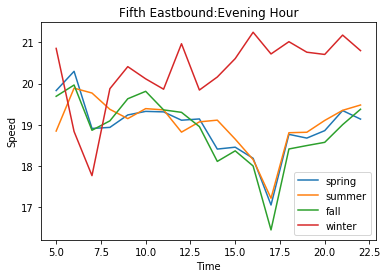

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(avg1, label = 'spring' )
plt.plot(avg2,label = 'summer')
plt.plot(avg3,label='fall')
plt.plot(avg4,label='winter')
plt.title('Fifth Eastbound:Evening Hour')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')

Text(0,0.5,'Speed')

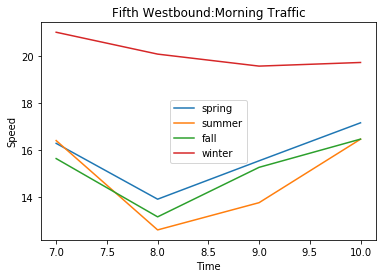

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(avg1a, label = 'spring' )
plt.plot(avg2a,label = 'summer')
plt.plot(avg3a,label='fall')
plt.plot(avg4a,label='winter')
plt.title('Fifth Westbound:Morning Traffic')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')